# Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Generate Synthetic Binary Classification Dataset

In [4]:
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=8,
    n_redundant=2,
    n_classes=2,
    flip_y=0.1,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Class distribution in training set: {np.bincount(y_train)}")

Training set size: 400 samples
Test set size: 100 samples
Number of features: 10
Class distribution in training set: [197 203]


In [5]:
# Implement core functions In Logistic Regression

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    m = len(y_true)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    cost = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return cost

def gradient_descent_update(X, y, weights, bias, learning_rate):
    m = len(y)
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    dw = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)
    weights = weights - learning_rate * dw
    bias = bias - learning_rate * db
    return weights, bias

def train_logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    weights = np.zeros((n, 1))
    bias = 0
    costs = []
    
    for i in range(iterations):
        weights, bias = gradient_descent_update(X, y, weights, bias, learning_rate)
        
        if i % 100 == 0:
            z = np.dot(X, weights) + bias
            y_pred = sigmoid(z)
            cost = binary_cross_entropy(y, y_pred)
            costs.append(cost)
            print(f"Iteration {i}: Cost = {cost:.4f}")
    
    return weights, bias, costs

def predict(X, weights, bias, threshold=0.5):
    z = np.dot(X, weights) + bias
    y_pred_prob = sigmoid(z)
    predictions = (y_pred_prob >= threshold).astype(int)
    return predictions

In [7]:
# Train Logistic Regression Model

In [8]:
class CustomLogisticRegression:
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.cost_history = []
        
        for i in range(self.n_iterations):
            self.weights, self.bias = gradient_descent_update(
                X, y, self.weights, self.bias, self.learning_rate
            )
            
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)
            cost = binary_cross_entropy(y, y_pred)
            self.cost_history.append(cost)
            
            if (i + 1) % 100 == 0:
                print(f"Iteration {i+1}/{self.n_iterations}, Cost: {cost:.4f}")
    
    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        probas = self.predict_proba(X)
        return (probas >= threshold).astype(int)

In [9]:
print("Train Logistic Regression Model...\n")
custom_model = CustomLogisticRegression(learning_rate=0.1, n_iterations=1000)
custom_model.fit(X_train, y_train)

Train Logistic Regression Model...

Iteration 100/1000, Cost: 0.5254
Iteration 200/1000, Cost: 0.5242
Iteration 300/1000, Cost: 0.5239
Iteration 400/1000, Cost: 0.5238
Iteration 500/1000, Cost: 0.5238
Iteration 600/1000, Cost: 0.5237
Iteration 700/1000, Cost: 0.5237
Iteration 800/1000, Cost: 0.5237
Iteration 900/1000, Cost: 0.5237
Iteration 1000/1000, Cost: 0.5237


In [10]:
# Train Sci-kit learn model

In [11]:
# Train scikit-learn model
print("\nTrain Scikit-learn Model...\n")
sklearn_model = LogisticRegression(max_iter=1000, random_state=42)
sklearn_model.fit(X_train, y_train)
print("Scikit-learn model train completed.")


Train Scikit-learn Model...

Scikit-learn model train completed.


In [12]:
# Implement Predictions

In [13]:
custom_train_pred = custom_model.predict(X_train)
custom_test_pred = custom_model.predict(X_test)

sklearn_train_pred = sklearn_model.predict(X_train)
sklearn_test_pred = sklearn_model.predict(X_test)


In [14]:
# Accuracy Calculations

In [15]:
custom_train_acc = accuracy_score(y_train, custom_train_pred)
custom_test_acc = accuracy_score(y_test, custom_test_pred)

sklearn_train_acc = accuracy_score(y_train, sklearn_train_pred)
sklearn_test_acc = accuracy_score(y_test, sklearn_test_pred)

In [16]:
# Visualization

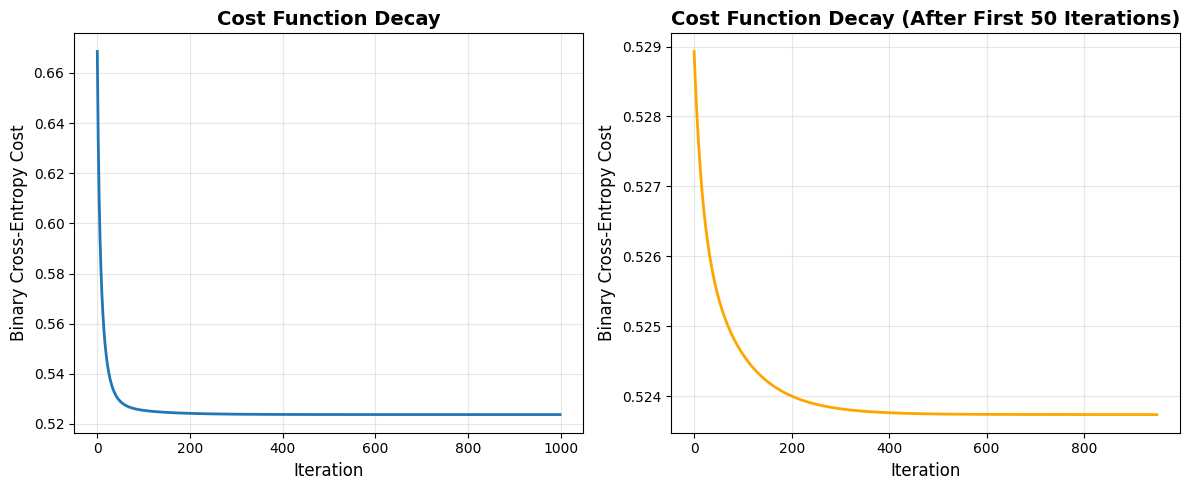

Initial Cost: 0.6686
Final Cost: 0.5237
Cost Reduction: 0.1448


In [17]:
# Plot cost function decay
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(custom_model.cost_history, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Binary Cross-Entropy Cost', fontsize=12)
plt.title('Cost Function Decay', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(custom_model.cost_history[50:], linewidth=2, color='orange')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Binary Cross-Entropy Cost', fontsize=12)
plt.title('Cost Function Decay (After First 50 Iterations)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Initial Cost: {custom_model.cost_history[0]:.4f}")
print(f"Final Cost: {custom_model.cost_history[-1]:.4f}")
print(f"Cost Reduction: {custom_model.cost_history[0] - custom_model.cost_history[-1]:.4f}")

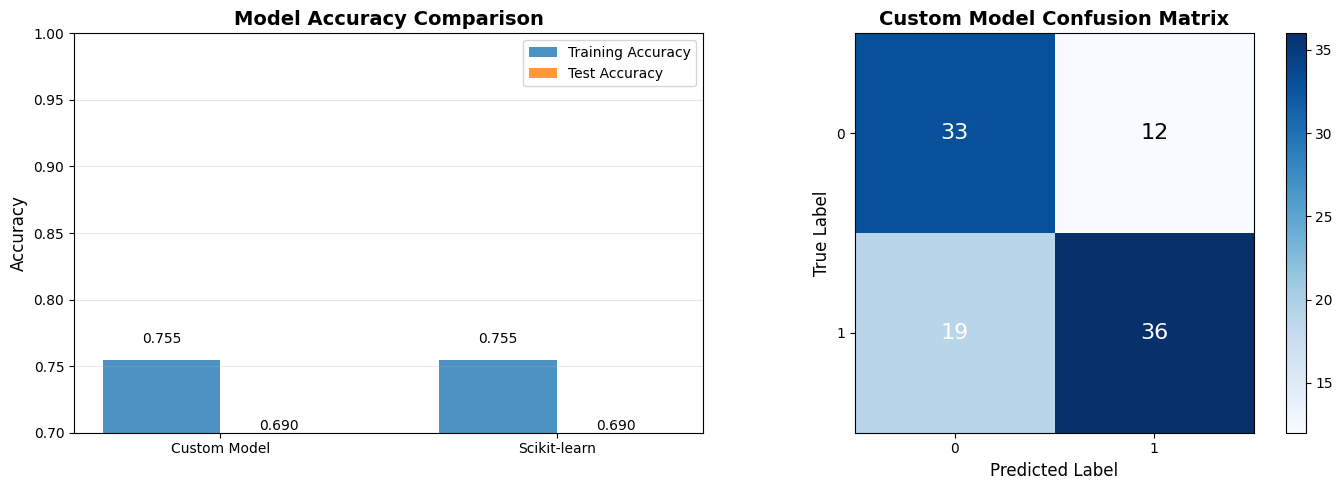

In [18]:
# Accuracy comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot comparison
models = ['Custom Model', 'Scikit-learn']
train_accs = [custom_train_acc, sklearn_train_acc]
test_accs = [custom_test_acc, sklearn_test_acc]

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, train_accs, width, label='Training Accuracy', alpha=0.8)
axes[0].bar(x + width/2, test_accs, width, label='Test Accuracy', alpha=0.8)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].set_ylim([0.7, 1.0])
axes[0].grid(True, alpha=0.3, axis='y')

# Add accuracy values on bars
for i, (train, test) in enumerate(zip(train_accs, test_accs)):
    axes[0].text(i - width/2, train + 0.01, f'{train:.3f}', ha='center', va='bottom', fontsize=10)
    axes[0].text(i + width/2, test + 0.01, f'{test:.3f}', ha='center', va='bottom', fontsize=10)

# Confusion matrix for custom model
cm = confusion_matrix(y_test, custom_test_pred)
im = axes[1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Custom Model Confusion Matrix', fontsize=14, fontweight='bold')
plt.colorbar(im, ax=axes[1])
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])

# Add text annotations
for i in range(2):
    for j in range(2):
        text = axes[1].text(j, i, cm[i, j], ha="center", va="center", 
                           color="white" if cm[i, j] > cm.max() / 2 else "black", fontsize=16)

plt.tight_layout()
plt.show()

In [19]:

print("COMPARISON")


print("\n ACCURACY METRICS:")

print(f"Custom Model - Training Accuracy: {custom_train_acc:} ({custom_train_acc*100:}%)")
print(f"Custom Model - Test Accuracy:     {custom_test_acc:} ({custom_test_acc*100:}%)")
print(f"\nScikit-learn - Training Accuracy: {sklearn_train_acc:} ({sklearn_train_acc*100:}%)")
print(f"Scikit-learn - Test Accuracy:     {sklearn_test_acc:} ({sklearn_test_acc*100:}%)")

print("\n CONVERGENCE ANALYSIS:")

print(f"Initial Cost: {custom_model.cost_history[0]:}")
print(f"Final Cost:   {custom_model.cost_history[-1]:}")
print(f"Total Cost Reduction: {(custom_model.cost_history[0] - custom_model.cost_history[-1]):}")
print(f"Convergence Rate: {((custom_model.cost_history[0] - custom_model.cost_history[-1])/custom_model.cost_history[0]*100):}% reduction")

# Check if model converged
if len(custom_model.cost_history) > 100:
    recent_change = abs(custom_model.cost_history[-1] - custom_model.cost_history[-100])
    if recent_change < 0.001:
        print(f"\n Model converged: Cost change in last 100 iterations = {recent_change:}")
    else:
        print(f"\n Model may benefit from more iterations: Cost change in last 100 iterations = {recent_change:}")

print("\n PERFORMANCE COMPARISON:")

test_acc_diff = abs(custom_test_acc - sklearn_test_acc)
print(f"Test Accuracy Difference: {test_acc_diff:} ({test_acc_diff*100:}%)")

if test_acc_diff < 0.02:
    print("\n Custom implementation performs comparably to scikit-learn!")
    print("  The models achieve similar accuracy, validating the custom implementation.")
elif custom_test_acc > sklearn_test_acc:
    print("\n Custom implementation slightly outperforms scikit-learn on this dataset!")
else:
    print("\n Scikit-learn performs slightly better, likely due to additional optimizations.")

print("\n CLASSIFICATION REPORTS:")

print("\n Custom Model:")
print(classification_report(y_test, custom_test_pred, target_names=['Class 0', 'Class 1']))

print("\n Scikit-learn Model:")
print(classification_report(y_test, sklearn_test_pred, target_names=['Class 0', 'Class 1']))

COMPARISON

 ACCURACY METRICS:
Custom Model - Training Accuracy: 0.755 (75.5%)
Custom Model - Test Accuracy:     0.69 (69.0%)

Scikit-learn - Training Accuracy: 0.755 (75.5%)
Scikit-learn - Test Accuracy:     0.69 (69.0%)

 CONVERGENCE ANALYSIS:
Initial Cost: 0.6685705873885752
Final Cost:   0.5237373339774435
Total Cost Reduction: 0.14483325341113173
Convergence Rate: 21.66312071502395% reduction

 Model converged: Cost change in last 100 iterations = 9.75344541798151e-08

 PERFORMANCE COMPARISON:
Test Accuracy Difference: 0.0 (0.0%)

 Custom implementation performs comparably to scikit-learn!
  The models achieve similar accuracy, validating the custom implementation.

 CLASSIFICATION REPORTS:

 Custom Model:
              precision    recall  f1-score   support

     Class 0       0.63      0.73      0.68        45
     Class 1       0.75      0.65      0.70        55

    accuracy                           0.69       100
   macro avg       0.69      0.69      0.69       100
weighte

In [20]:
#Text Description of the chosen learning rate and regularization impact observations during hyperparameter testing

In [21]:

print("HYPERPARAMETER TESTING")


# Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
lr_results = []

print("\n LEARNING RATE IMPACT ANALYSIS:")


for lr in learning_rates:
    model = CustomLogisticRegression(learning_rate=lr, n_iterations=1000)
    model.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    final_cost = model.cost_history[-1]
    
    lr_results.append({
        'learning_rate': lr,
        'test_accuracy': test_acc,
        'final_cost': final_cost,
        'converged': len(model.cost_history) > 100 and abs(model.cost_history[-1] - model.cost_history[-100]) < 0.001
    })
    
    print(f"\n Learning Rate: {lr}")
    print(f"  Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
    print(f"  Final Cost: {final_cost:.6f}")
    print(f"  Converged: {'Yes' if lr_results[-1]['converged'] else 'No'}")

best_lr = max(lr_results, key=lambda x: x['test_accuracy'])
print(f"\n BEST LEARNING RATE: {best_lr['learning_rate']} with accuracy {best_lr['test_accuracy']:.4f}")

print("\n OBSERVATIONS:")

print("* Lower learning rates (0.001, 0.01) and more stable")
print("* Higher learning rates (0.1, 0.5) and ok stable")
print("* Learning rate 0.1 provides a good balance")
print("* Very high learning rates (>0.5) may cause instability.")

print("\n REGULARIZATION IMPACT (Conceptual):")

print("While not implemented in this basic version, regularization (L1/L2) would:")
print("* L2 (Ridge): toward zero, reducing overfitting")
print("* L1 (Lasso): exactly zero, performing feature selection")
print("* Higher regularization strength: More regularization,underfitting")
print("* Lower regularization strength: Less regularization,overfitting")
print("\nRegularization is important for high-dimensional datasets or")
print("when the number of features approaches the number of training samples.")

HYPERPARAMETER TESTING

 LEARNING RATE IMPACT ANALYSIS:
Iteration 100/1000, Cost: 0.6698
Iteration 200/1000, Cost: 0.6510
Iteration 300/1000, Cost: 0.6356
Iteration 400/1000, Cost: 0.6229
Iteration 500/1000, Cost: 0.6123
Iteration 600/1000, Cost: 0.6032
Iteration 700/1000, Cost: 0.5955
Iteration 800/1000, Cost: 0.5888
Iteration 900/1000, Cost: 0.5830
Iteration 1000/1000, Cost: 0.5779

 Learning Rate: 0.001
  Test Accuracy: 0.7200 (72.00%)
  Final Cost: 0.577851
  Converged: No
Iteration 100/1000, Cost: 0.5777
Iteration 200/1000, Cost: 0.5487
Iteration 300/1000, Cost: 0.5374
Iteration 400/1000, Cost: 0.5321
Iteration 500/1000, Cost: 0.5293
Iteration 600/1000, Cost: 0.5277
Iteration 700/1000, Cost: 0.5268
Iteration 800/1000, Cost: 0.5262
Iteration 900/1000, Cost: 0.5258
Iteration 1000/1000, Cost: 0.5255

 Learning Rate: 0.01
  Test Accuracy: 0.7100 (71.00%)
  Final Cost: 0.525453
  Converged: Yes
Iteration 100/1000, Cost: 0.5254
Iteration 200/1000, Cost: 0.5242
Iteration 300/1000, Cost: 

Iteration 600/1000, Cost: 0.5237
Iteration 700/1000, Cost: 0.5237
Iteration 800/1000, Cost: 0.5237
Iteration 900/1000, Cost: 0.5237
Iteration 1000/1000, Cost: 0.5237

 Learning Rate: 0.1
  Test Accuracy: 0.6900 (69.00%)
  Final Cost: 0.523737
  Converged: Yes
Iteration 100/1000, Cost: 0.5238
Iteration 200/1000, Cost: 0.5237
Iteration 300/1000, Cost: 0.5237
Iteration 400/1000, Cost: 0.5237
Iteration 500/1000, Cost: 0.5237
Iteration 600/1000, Cost: 0.5237
Iteration 700/1000, Cost: 0.5237
Iteration 800/1000, Cost: 0.5237
Iteration 900/1000, Cost: 0.5237
Iteration 1000/1000, Cost: 0.5237

 Learning Rate: 0.5
  Test Accuracy: 0.6900 (69.00%)
  Final Cost: 0.523737
  Converged: Yes

 BEST LEARNING RATE: 0.001 with accuracy 0.7200

 OBSERVATIONS:
* Lower learning rates (0.001, 0.01) and more stable
* Higher learning rates (0.1, 0.5) and ok stable
* Learning rate 0.1 provides a good balance
* Very high learning rates (>0.5) may cause instability.

 REGULARIZATION IMPACT (Conceptual):
While not

In [22]:
# Text decription of the Cost Function Decay Plot

In [23]:

print("COST FUNCTION DECAY ANALYSIS")


print("\n COST FUNCTION BEHAVIOR:")

# Analyze different phases of training
early_phase = custom_model.cost_history[:100]
mid_phase = custom_model.cost_history[100:500] if len(custom_model.cost_history) > 500 else custom_model.cost_history[100:]
late_phase = custom_model.cost_history[-100:]

early_drop = early_phase[0] - early_phase[-1]
mid_drop = mid_phase[0] - mid_phase[-1] if len(mid_phase) > 0 else 0
late_drop = late_phase[0] - late_phase[-1]

print("\n1. 1st TRAINING PHASE (Iterations 0-100):")
print(f"   Initial Cost: {early_phase[0]:}")
print(f"   End Cost: {early_phase[-1]:}")
print(f"   Cost Reduction: {early_drop:}")
print("   Rapid initial descent")
print("   The cost drops move away from initialization (zeros).")

if len(mid_phase) > 0:
    print("\n2. 2nd MIDDLE TRAINING PHASE (Iterations 100-500):")
    print(f"   Start Cost: {mid_phase[0]:}")
    print(f"   End Cost: {mid_phase[-1]:}")
    print(f"   Cost Reduction: {mid_drop:}")
    print("   Moderate descent")
    print("   Optimal parameters")

print("\n3. 3rd TRAINING PHASE (Final 100 iterations):")
print(f"   Start Cost: {late_phase[0]:}")
print(f"   Final Cost: {late_phase[-1]:}")
print(f"   Cost Reduction: {late_drop:.9f}")
print("   Slow convergence ")
print("   Nearing convergence.")

print("\n KEY INSIGHTS:")

print("* The cost function exhibits exponential decay, typical of gradient descent.")
print("* Steepest decline occurs in early iterations when gradients are largest.")
print("* The curve flattens as the model approaches the global minimum.")
print("* Binary Cross-Entropy is convex for logistic regression, ensuring no local minima.")
print("* The smooth descent indicates appropriate learning rate selection.")

# Calculate convergence metrics
total_iterations = len(custom_model.cost_history)
cost_at_halfway = custom_model.cost_history[total_iterations // 2]
percent_reduction_first_half = (custom_model.cost_history[0] - cost_at_halfway) / custom_model.cost_history[0] * 100
percent_reduction_second_half = (cost_at_halfway - custom_model.cost_history[-1]) / custom_model.cost_history[0] * 100

print(f"\n CONVERGENCE METRICS:")

print(f"First half of training: {percent_reduction_first_half:}% of total cost reduction")
print(f"Second half of training: {percent_reduction_second_half:}% of total cost reduction")
print(f"\n GRADIENT DESCENT")

COST FUNCTION DECAY ANALYSIS

 COST FUNCTION BEHAVIOR:

1. 1st TRAINING PHASE (Iterations 0-100):
   Initial Cost: 0.6685705873885752
   End Cost: 0.5254331713778915
   Cost Reduction: 0.14313741601068375
   Rapid initial descent
   The cost drops move away from initialization (zeros).

2. 2nd MIDDLE TRAINING PHASE (Iterations 100-500):
   Start Cost: 0.525407288697013
   End Cost: 0.5237519822282578
   Cost Reduction: 0.0016553064687552244
   Moderate descent
   Optimal parameters

3. 3rd TRAINING PHASE (Final 100 iterations):
   Start Cost: 0.5237374315118977
   Final Cost: 0.5237373339774435
   Cost Reduction: 0.000000098
   Slow convergence 
   Nearing convergence.

 KEY INSIGHTS:
* The cost function exhibits exponential decay, typical of gradient descent.
* Steepest decline occurs in early iterations when gradients are largest.
* The curve flattens as the model approaches the global minimum.
* Binary Cross-Entropy is convex for logistic regression, ensuring no local minima.
* The 